# **Predict the Introverts from the Extroverts**

## Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [128]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [129]:
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [130]:
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


## Performing Data Cleaning and Analysis

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [132]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           5750 non-null   float64
 2   Stage_fear                 5577 non-null   object 
 3   Social_event_attendance    5778 non-null   float64
 4   Going_outside              5709 non-null   float64
 5   Drained_after_socializing  5743 non-null   object 
 6   Friends_circle_size        5825 non-null   float64
 7   Post_frequency             5767 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 386.1+ KB


In [133]:
def change(str):
    if str == 'Yes':
        return 1
    elif str == 'No':
        return 0
    
train['Stage_fear'] = train['Stage_fear'].apply(change)
test['Stage_fear'] = test['Stage_fear'].apply(change)


train['Drained_after_socializing'] = train['Drained_after_socializing'].apply(change)
test['Drained_after_socializing'] = test['Drained_after_socializing'].apply(change)


train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,Extrovert
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,Extrovert


In [134]:
train_nulls = train.isnull().sum().sort_values(ascending=False)
test_nulls = test.isnull().sum().sort_values(ascending=False)
print(train_nulls)
print(test_nulls)

Stage_fear                   1893
Going_outside                1466
Post_frequency               1264
Time_spent_Alone             1190
Social_event_attendance      1180
Drained_after_socializing    1149
Friends_circle_size          1054
id                              0
Personality                     0
dtype: int64
Stage_fear                   598
Going_outside                466
Drained_after_socializing    432
Time_spent_Alone             425
Post_frequency               408
Social_event_attendance      397
Friends_circle_size          350
id                             0
dtype: int64


In [135]:
train = train.fillna(train.median(numeric_only=True))
test = test.fillna(test.median(numeric_only=True))

In [136]:
train_nulls = train.isnull().sum().sort_values(ascending=False)
test_nulls = test.isnull().sum().sort_values(ascending=False)
print(train_nulls)
print(test_nulls)

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [137]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["Personality"] = le.fit_transform(train["Personality"])  # Introvert=0, Extrovert=1
train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,0
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,0
2,2,6.0,1.0,1.0,0.0,0.0,3.0,0.0,1
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,0
4,4,1.0,0.0,4.0,4.0,0.0,13.0,5.0,0


<Axes: >

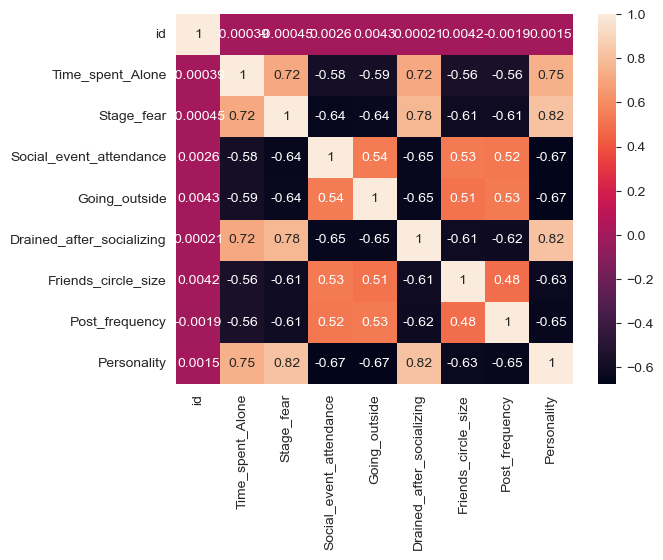

In [138]:
sns.heatmap(train.corr(), annot=True)

In [139]:
X = train.drop(["id", "Personality"], axis=1)
y = train["Personality"]

## Train Model

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2753
           1       0.94      0.93      0.93       952

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [141]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Testing model Accuracy 

In [142]:
accuracy = round(model.score(X_train,y_train), 2)
print(f'\nModel Accuracy: {accuracy * 100:.2f} %')


Model Accuracy: 99.00 %


In [143]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.96329285 0.96626181 0.95708502 0.96194332 0.97084233]
Mean accuracy: 0.9638850657129616


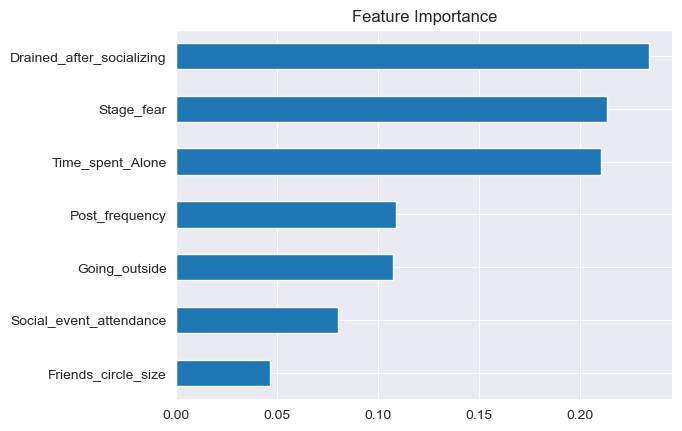

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


In [145]:
X_test = test.drop(["id"], axis=1)
test_preds = model.predict(X_test)

# Decode labels back to text
test_preds_text = le.inverse_transform(test_preds)

# output
submission = pd.DataFrame({
    "id": test["id"],
    "Predicted_Personality": test_preds_text
})

submission.to_csv("submission.csv", index=False)
